In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX- DATA COMPOSITION 3 (90-5-5).csv', index_col="Monthly", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Monthly,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,27,44,24,16,22,5,47,0,9,Train


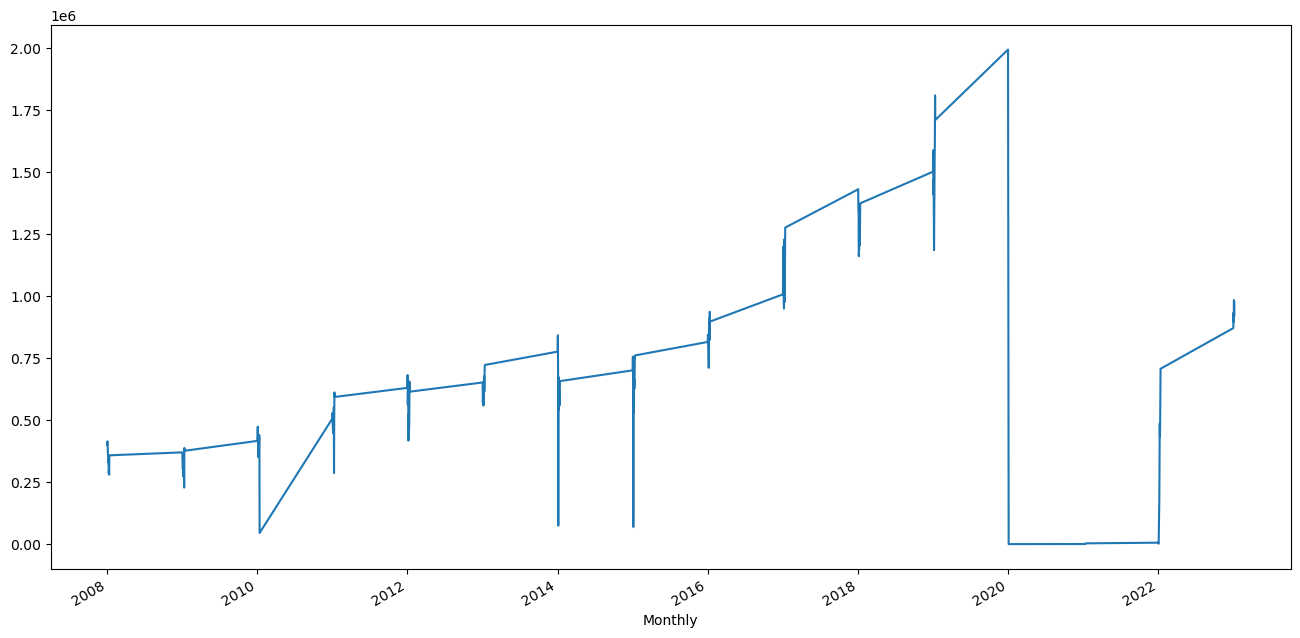

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Monthly                                                            
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Monthly                                       

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.13 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.05 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.13 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.05 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/12/2021'].dropna()
test = df1['Tourist Arrival']['01/01/2022':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/12/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/01/2022':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20725D+01    |proj g|=  1.93603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   23      4      7      1     0     0   7.354D-06   1.207D+01
  F =   12.071834274873268     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2028.068
Date:                            Wed, 23 Aug 2023   AIC                           4102.136
Time:                                    21:26:57   BIC                           4172.135
Sample:                                         0   HQIC                          4130.568
                                            - 168                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts            85.9599    381.564      0.225      0.822    -661.891     833.811
Number of Comments         36.6586     38.871      0.943      0.346     -39.526     112.844
Airbnb Vietnam           -849.1253   2191.300     -0.387      0.698   -5143.994    3445.744
Vietnam restaurant       2670.5139   2547.335      1.048      0.294   -2322.172    7663.199
Shopping in Hanoi         400.1952   2637.693      0.152      0.879   -4769.588    5569.978
Shopping in Ho Chi Minh   615.8280   2787.042      0.221      0.825   -4846.675    6078.331
 Vietnam tour            2474.3046   3726.692      0.664      0.507   -4829.877    9778.486
 Skyscanner              6134.9884   3862.292      1.588      0.112   -1434.964    1.37e+04
 Vietnam visa            3572.7974   3375.072      1.059      0.290   -3042.222    1.02e+04
 Vietnam airport         -910.8155   3439.069     -0.265      0.791   -7651.267    5829.636
 Vietnam flights        -1953.2894   3277.197     -0.596      0.551   -8376.477    4469.898
 Danang airport           606.5449   1509.058      0.402      0.688   -2351.155    3564.245
 Hoi An                 -2505.0160   1739.462     -1.440      0.150   -5914.300     904.268
 Vietnam weather          -58.2229   2102.526     -0.028      0.978   -4179.099    4062.653
 Visa for Vietnam        1892.9761   3972.511      0.477      0.634   -5893.003    9678.955
 Sgn airport             1528.5593   1899.505      0.805      0.421   -2194.402    5251.521
 Phu Quoc                3284.2665   1706.004      1.925      0.054     -59.440    6627.973
 Vietnam itinerary      -2288.0027   2444.941     -0.936      0.349   -7080.000    2503.995
 Vietnam trip            4195.9316   1860.164      2.256      0.024     550.077    7841.786
 Things to do in Hue     4352.5014   2998.129      1.452      0.147   -1523.723    1.02e+04
 Vietnam backpackers    -6449.1892   2770.906     -2.327      0.020   -1.19e+04   -1018.314
ar.S.L12                    0.3684      0.069      5.308      0.000       0.232       0.504
sigma2                   1.358e+10      0.006   2.42e+12      0.000    1.36e+10    1.36e+10
===================================================================================
Ljung-Box (L1) (Q):                  18.32   Jarque-Bera (JB):               235.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.23
Prob(H) (two-sided):                  0.51   Kurtosis:                         9.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.1e+27. Standard errors may be unstable.
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 317059.0113782827


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 283520.69550940837


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 13.818055469340322


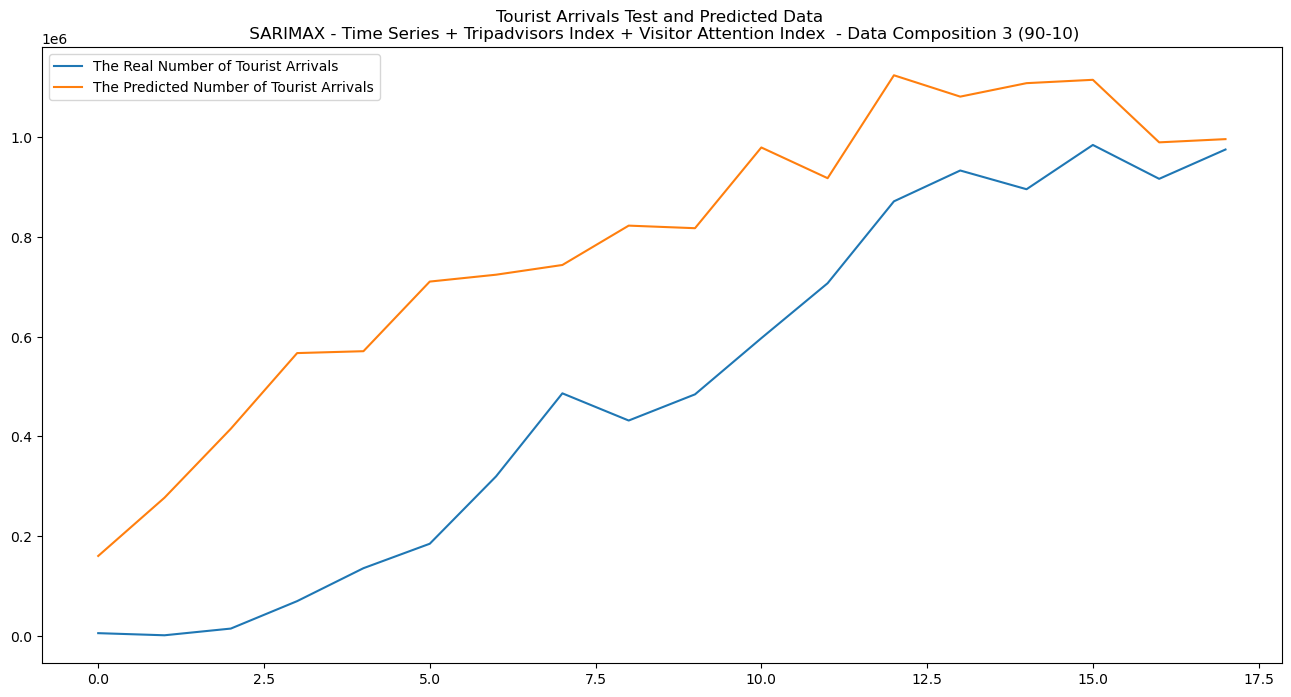

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index  - Data Composition 3 (90-10)")
plt.legend()
plt.show()